# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [51]:
dataset = "https://raw.githubusercontent.com/miezlearning/Coding-Camp-2025/refs/heads/master/Belajar%20Machine%20Learning%20untuk%20Pemula/Dataset/smoking.csv"

try:
  df = pd.read_csv(dataset)
  print("Data berhasil dibaca!")
  print("Jumlah baris dan kolom:", df.shape)
except FileNotFoundError:
  print(f"Error: Tidak ditemukan {dataset}. coba cek dataset.")
except pd.errors.ParserError:
    print(f"Error: Tidak bisa digunakan {dataset}. coba cek format filenya.")
except Exception as e:
    print(f"Error: {e}")


Data berhasil dibaca!
Jumlah baris dan kolom: (3900, 7)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 📌 Informasi Dataset

In [52]:
print("\n📌 Info Dataset:")
print(df.info())

df


📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB
None


,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


## 📊 Statistik Deskriptif

In [53]:
print("\n📊 Statistik Deskriptif:")
print(df.describe(include='all')) # untuk data kategorikal juga ditampilkan


📊 Statistik Deskriptif:
                age     sex current_smoker   heart_rate blood_pressure  \
count   3900.000000    3900           3900  3900.000000           3900   
unique          NaN       2              2          NaN           2317   
top             NaN  female             no          NaN         130/80   
freq            NaN    2081           1968          NaN             18   
mean      49.537949     NaN            NaN    75.688974            NaN   
std        8.559275     NaN            NaN    12.015376            NaN   
min       32.000000     NaN            NaN    44.000000            NaN   
25%       42.000000     NaN            NaN    68.000000            NaN   
50%       49.000000     NaN            NaN    75.000000            NaN   
75%       56.000000     NaN            NaN    82.000000            NaN   
max       70.000000     NaN            NaN   143.000000            NaN   

        cigs_per_day         chol  
count    3886.000000  3893.000000  
unique        

## 🔍 Missing Values


🔍 Missing Values:
cigs_per_day    14
chol             7
dtype: int64


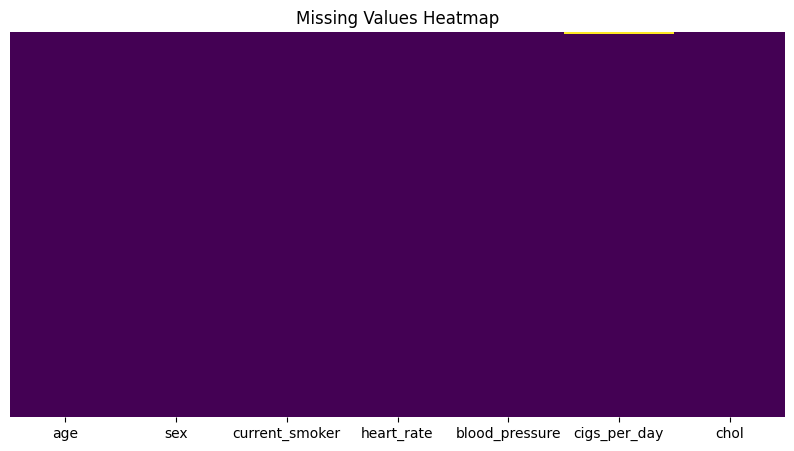

In [54]:
print("\n🔍 Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # guna untuk menampilkan kolom missing values saja.

# Visualisasi Missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## 🧐 Jumlah Nilai Unik

In [55]:
print("\n🧐 Jumlah Nilai Unik per Kolom:")
print(df.nunique())


🧐 Jumlah Nilai Unik per Kolom:
age                 39
sex                  2
current_smoker       2
heart_rate          73
blood_pressure    2317
cigs_per_day        33
chol               243
dtype: int64


## Visualisasi distribusi numerik

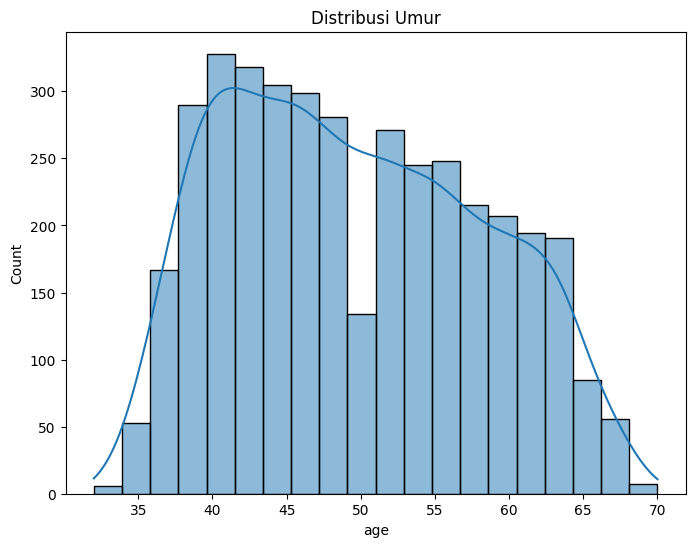

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribusi Umur")
plt.show()

## Visualisasi kategorikal

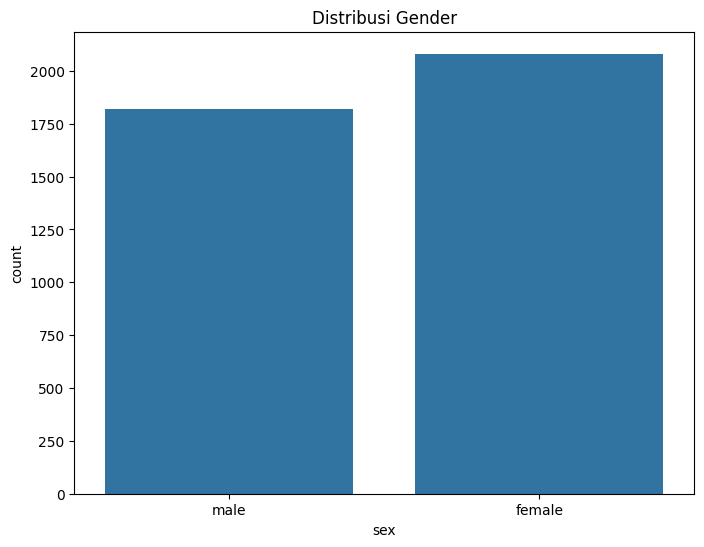

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title("Distribusi Gender")
plt.show()

### Distribusi Data Numerik dan Kategorikal

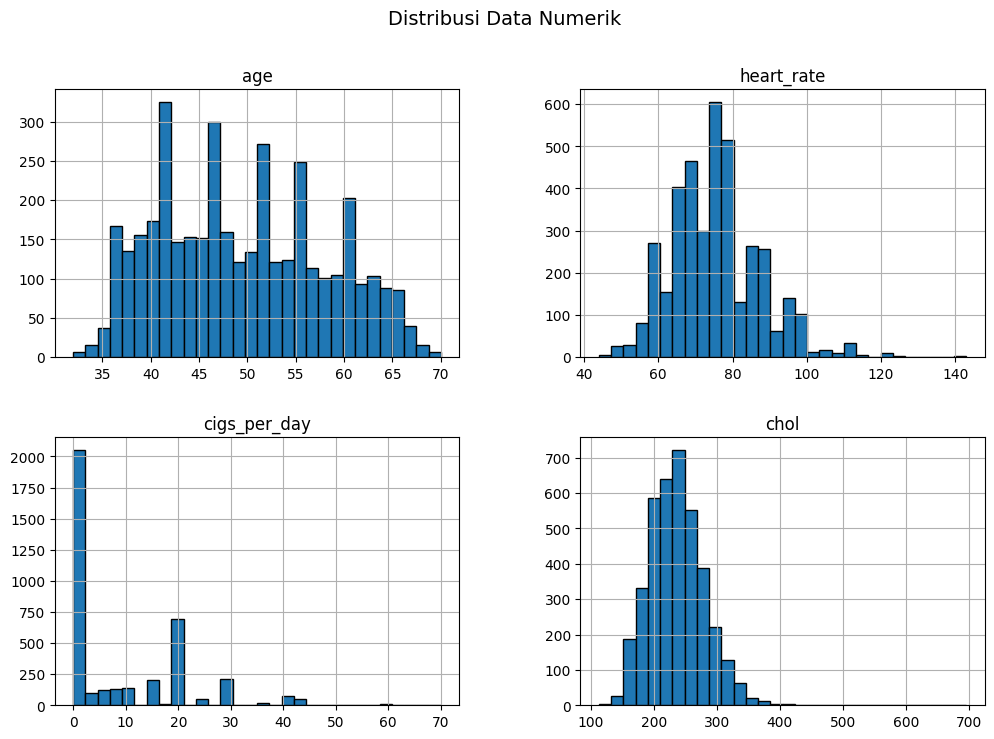

In [58]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribusi Data Numerik", fontsize=14)
plt.show()

<ipython-input-59-0e3506ea44f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="Set2", order=df[col].value_counts().index)


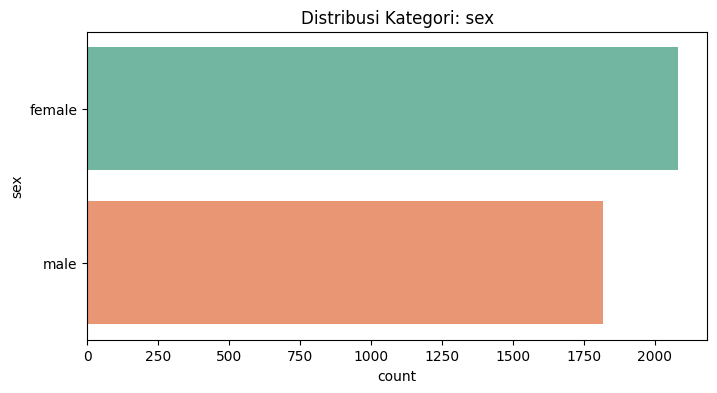

<ipython-input-59-0e3506ea44f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="Set2", order=df[col].value_counts().index)


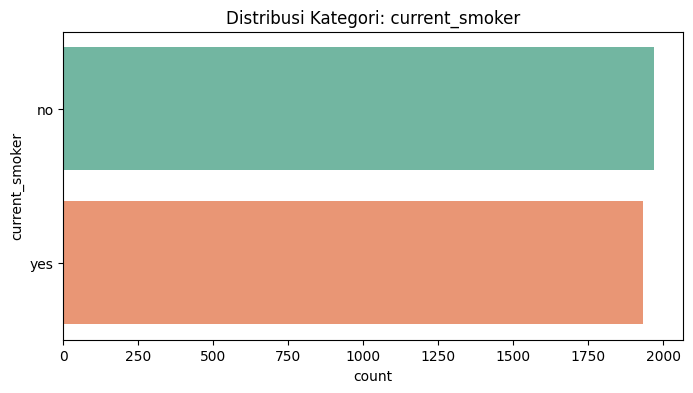

<ipython-input-59-0e3506ea44f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="Set2", order=df[col].value_counts().index)


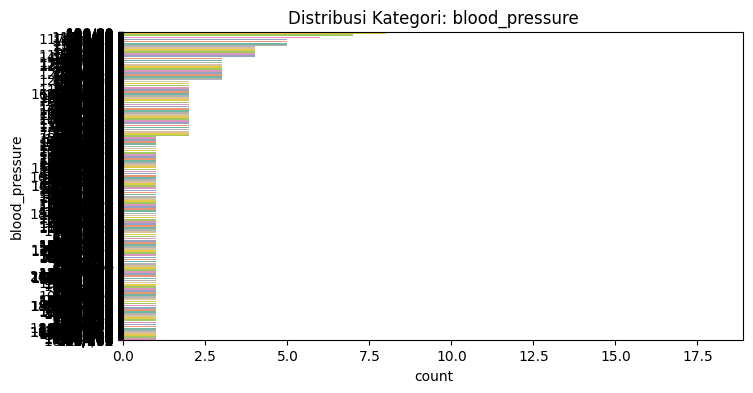

In [59]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribusi Kategori: {col}")
    plt.show()

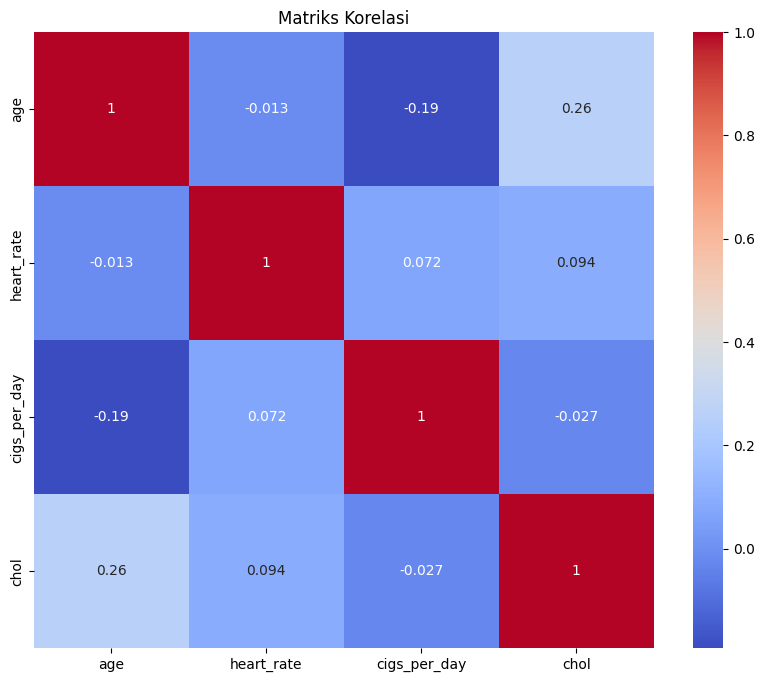

In [60]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Duplikasi sebelum Pre-Processing 🤔

In [61]:
# Membuat copyan agar memudahkan proses sebelum pre processing
df_copyan = df.copy()
print("Berhasil copy.")

Berhasil copy.


## Menghapus Missing Values

1. **Menampilkan jumlah missing values sebelum diproses**  
   - Mengecek jumlah nilai yang hilang (`NaN`) dalam setiap kolom sebelum dilakukan pemrosesan.  

2. **Mengisi Nilai Kosong pada `cigs_per_day` dengan 0**  
   - Jika ada data kosong dalam kolom `cigs_per_day`, diasumsikan bahwa individu tersebut **tidak merokok**, sehingga diisi dengan `0`.

3. **Memisahkan Kolom `blood_pressure`**  
   - Kolom `blood_pressure` berisi data tekanan darah dalam format `sistolik/diastolik` (misalnya `120/80`).  
   - Data ini dipisahkan menjadi dua kolom baru:  
     - **`systolic_bp`** → Tekanan darah sistolik  
     - **`diastolic_bp`** → Tekanan darah diastolik  

4. **Mengonversi Tekanan Darah ke Format Numerik**  
   - Setelah dipisahkan, nilai tekanan darah diubah ke tipe **numerik** (`int/float`).  
   - Jika ada data yang tidak bisa dikonversi (misalnya format salah), nilainya akan menjadi `NaN`.

5. **Menghapus Kolom `blood_pressure` yang Sudah Dipisah**  
   - Karena data tekanan darah sudah dipecah menjadi dua kolom baru, maka **kolom aslinya dihapus**.

6. **Menghapus Baris dengan Missing Values pada `systolic_bp` & `diastolic_bp`**  
   - Jika ada baris yang **masih memiliki NaN** pada kolom tekanan darah setelah proses pemisahan, **baris tersebut dihapus**.

7. **Menghapus Semua Baris dengan Missing Values**  
   - Untuk memastikan dataset bersih sepenuhnya, **baris dengan nilai kosong di kolom lain juga dihapus**.

8. **Menampilkan Jumlah Missing Values Setelah Pemrosesan**  
   - Mengecek kembali apakah masih ada `NaN` dalam dataset setelah semua proses dilakukan.  


In [62]:
print("\n🔍 Jumlah Missing Values sebelum dihapus:")
print(df_copyan.isnull().sum())

df_copyan['cigs_per_day'] = df_copyan['cigs_per_day'].fillna(0)

df_copyan[['systolic_bp', 'diastolic_bp']] = df_copyan['blood_pressure'].str.split('/', expand=True)
df_copyan['systolic_bp'] = pd.to_numeric(df_copyan['systolic_bp'], errors='coerce')
df_copyan['diastolic_bp'] = pd.to_numeric(df_copyan['diastolic_bp'], errors='coerce')
df_copyan = df_copyan.drop('blood_pressure', axis=1)

df_copyan = df_copyan.dropna(subset=['systolic_bp', 'diastolic_bp'])
df_copyan.dropna(inplace=True)

print("\n✅ Missing Values setelah diisi dan dihapus:")
print(df_copyan.isnull().sum())


🔍 Jumlah Missing Values sebelum dihapus:
age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

✅ Missing Values setelah diisi dan dihapus:
age               0
sex               0
current_smoker    0
heart_rate        0
cigs_per_day      0
chol              0
systolic_bp       0
diastolic_bp      0
dtype: int64


## Handling data yang Duplikat

In [63]:
print("\n🔄 Jumlah duplikasi sebelum dihapus:", df_copyan.duplicated().sum())

if df_copyan.duplicated().sum() > 0:
    df_copyan.drop_duplicates(inplace=True)
    print("✅ Duplikasi ditemukan dan telah dihapus.")
    print("✅ Jumlah duplikasi setelah dihapus:", df_copyan.duplicated().sum())
else:
    print("❌ Tidak ada duplikasi dalam dataset.")



🔄 Jumlah duplikasi sebelum dihapus: 0
❌ Tidak ada duplikasi dalam dataset.


## Encoding Data Kategorikal

In [64]:
categorical_cols = ['sex', 'current_smoker']
label_encoders = {}

print("\n🎭 Encoding data kategorikal...")
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_copyan[col + '_encoded'] = label_encoders[col].fit_transform(df_copyan[col])

df_copyan.drop(categorical_cols, axis=1, inplace=True)  # Hapus kolom aslinya

print("\n✅ Contoh hasil encoding:")
print(df_copyan.head())


🎭 Encoding data kategorikal...

✅ Contoh hasil encoding:
   age  heart_rate  cigs_per_day   chol  systolic_bp  diastolic_bp  \
0   54          95           0.0  219.0        110.0          72.0   
1   45          64           0.0  248.0        121.0          72.0   
2   58          81           0.0  235.0        127.5          76.0   
3   42          90           0.0  225.0        122.5          80.0   
4   42          62           0.0  226.0        119.0          80.0   

   sex_encoded  current_smoker_encoded  
0            1                       1  
1            1                       1  
2            1                       1  
3            1                       1  
4            1                       1  


## Standarisasi


In [65]:
kolom_numerik = ['age', 'heart_rate', 'cigs_per_day', 'chol','systolic_bp', 'diastolic_bp']

print("\n📊 Statistik sebelum standarisasi:")
print(df_copyan[kolom_numerik].describe())

scaler = StandardScaler()
df_copyan[kolom_numerik] = scaler.fit_transform(df_copyan[kolom_numerik])

print("\n📏 Statistik setelah standarisasi:")
print(df_copyan[kolom_numerik].describe())

# Menampilkan beberapa contoh data setelah standarisasi
print("\n📌 Contoh data setelah standarisasi:")
print(df_copyan[kolom_numerik].head())


📊 Statistik sebelum standarisasi:
               age   heart_rate  cigs_per_day         chol  systolic_bp  \
count  3893.000000  3893.000000   3893.000000  3893.000000  3893.000000   
mean     49.534806    75.696378      9.130747   236.595941   132.388389   
std       8.561226    12.023947     12.026056    44.375365    21.984554   
min      32.000000    44.000000      0.000000   113.000000    83.500000   
25%      42.000000    68.000000      0.000000   206.000000   117.000000   
50%      49.000000    75.000000      0.000000   234.000000   128.000000   
75%      56.000000    82.000000     20.000000   263.000000   144.000000   
max      70.000000   143.000000     70.000000   696.000000   295.000000   

       diastolic_bp  
count   3893.000000  
mean      82.978294  
std       11.917382  
min       48.000000  
25%       75.000000  
50%       82.000000  
75%       90.000000  
max      142.500000  

📏 Statistik setelah standarisasi:
                age    heart_rate  cigs_per_day         

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [67]:
fitur_klustering = [
    'age',
    'heart_rate',
    'systolic_bp',
    'chol',
    'sex_encoded',
    'current_smoker_encoded'
]
X = df_copyan[fitur_klustering]

# model K-Means
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10) # Misalnya, 3 cluster
df_copyan['KMeans_Cluster'] = kmeans_model.fit_predict(X)

# Inisialisasi model Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=3)  # Misalnya, 3 cluster
df_copyan['Agg_Cluster'] = agg_model.fit_predict(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [68]:
# Silhouette Score untuk K-Means
kmeans_silhouette = silhouette_score(X, df_copyan['KMeans_Cluster'])
print(f"Silhouette Score untuk K-Means: {kmeans_silhouette}")

# Silhouette Score untuk Agglomerative Clustering
agg_silhouette = silhouette_score(X, df_copyan['Agg_Cluster'])
print(f"Silhouette Score untuk Agglomerative Clustering: {agg_silhouette}")

Silhouette Score untuk K-Means: 0.18677288964042052
Silhouette Score untuk Agglomerative Clustering: 0.12549905174956727


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [70]:
selector = SelectKBest(score_func=f_classif, k=4) #k=4 untuk memilih 4 fitur terbaik
X_selected = selector.fit_transform(X, df_copyan['KMeans_Cluster']) # Target tidak relevan untuk unsupervised, pakai cluster labels sementara

# Dapatkan indeks fitur yang terpilih
selected_feature_indices = selector.get_support(indices=True)
selected_features_names = [fitur_klustering[i] for i in selected_feature_indices]

print("\n✅ Fitur-fitur terbaik hasil Feature Selection (SelectKBest):")
for fitur in selected_features_names:
  print (fitur)

# Evaluasi Silhouette Score dengan fitur terseleksi untuk K-Means
kmeans_model_selected_features = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels_selected_features_kmeans = kmeans_model_selected_features.fit_predict(X_selected)
silhouette_score_selected_kmeans = silhouette_score(X_selected, cluster_labels_selected_features_kmeans)

print(f"\n✅ Silhouette Score untuk K-Means setelah Feature Selection: {silhouette_score_selected_kmeans}")

# Evaluasi Silhouette Score dengan fitur terseleksi untuk Agglomerative Clustering
agg_model_selected_features = AgglomerativeClustering(n_clusters=3)
cluster_labels_selected_features_agg = agg_model_selected_features.fit_predict(X_selected)
silhouette_score_selected_agg = silhouette_score(X_selected, cluster_labels_selected_features_agg)

print(f"Silhouette Score untuk Agglomerative Clustering setelah Feature Selection: {silhouette_score_selected_agg}")

print("\n📝 Perbandingan Silhouette Score:")
print(f"- K-Means (sebelum Feature Selection): {kmeans_silhouette:.4f}")
print(f"- K-Means (sesudah Feature Selection): {silhouette_score_selected_kmeans:.4f}")
print(f"- Agglomerative Clustering (sebelum Feature Selection): {agg_silhouette:.4f}")
print(f"- Agglomerative Clustering (sesudah Feature Selection): {silhouette_score_selected_agg:.4f}")


✅ Fitur-fitur terbaik hasil Feature Selection (SelectKBest):
age
heart_rate
systolic_bp
chol

✅ Silhouette Score untuk K-Means setelah Feature Selection: 0.23460297604115188
Silhouette Score untuk Agglomerative Clustering setelah Feature Selection: 0.1748763485283358

📝 Perbandingan Silhouette Score:
- K-Means (sebelum Feature Selection): 0.1868
- K-Means (sesudah Feature Selection): 0.2346
- Agglomerative Clustering (sebelum Feature Selection): 0.1255
- Agglomerative Clustering (sesudah Feature Selection): 0.1749


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

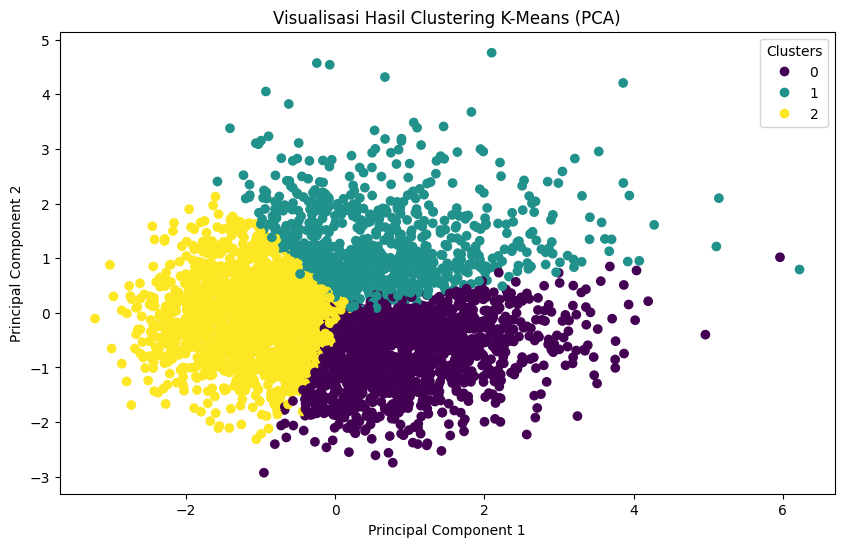

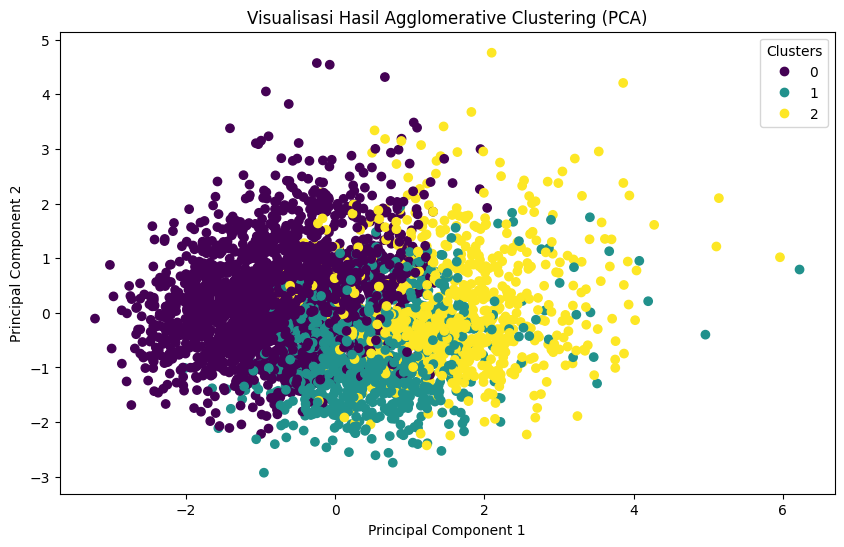

In [71]:
# PCA untuk reduksi dimensi menjadi 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected) # Gunakan fitur yang sudah terseleksi

# Visualisasi hasil clustering K-Means dengan fitur terseleksi
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_selected_features_kmeans, cmap='viridis')
plt.title('Visualisasi Hasil Clustering K-Means (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

# Visualisasi hasil Agglomerative Clustering dengan fitur terseleksi
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_selected_features_agg, cmap='viridis')
plt.title('Visualisasi Hasil Agglomerative Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [72]:
# Tidak ada karena sudah dilakukan.

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [73]:
def interpret_clusters(df, cluster_column, features, categorical_encoders, numerical_cols_original, categorical_cols_original):
    cluster_Aggregation = {}
    for cluster_num in sorted(df[cluster_column].unique()):
        cluster_data = df[df[cluster_column] == cluster_num]
        aggregation_stats = {}
        for col in features:
            if col in numerical_cols_original:
                aggregation_stats[col] = {
                    'mean': cluster_data[col].mean(),
                    'min': cluster_data[col].min(),
                    'max': cluster_data[col].max()
                }
            elif col.endswith('_encoded'):
                original_col_name = col[:-8]  # Hapus suffix '_encoded'
                original_values = categorical_encoders[original_col_name].inverse_transform(cluster_data[col])
                aggregation_stats[original_col_name] = {'mode': pd.Series(original_values).mode().iloc[0]}
        cluster_Aggregation[f'Cluster {cluster_num}'] = aggregation_stats
    return cluster_Aggregation

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

## Interpretasi K-Means

In [76]:
df_original_scale = df_copyan.copy()
df_original_scale[kolom_numerik] = scaler.inverse_transform(df_original_scale[kolom_numerik])

kmeans_cluster_stats = interpret_clusters(
    df_original_scale,
    'KMeans_Cluster',
    fitur_klustering,
    label_encoders,
    kolom_numerik,
    categorical_cols
)

print("\n📊 Interpretasi Cluster K-Means:")
for cluster_name, stats in kmeans_cluster_stats.items():
    print(f"\n{cluster_name}:")
    print("=" * 40)
    for feature, feature_stats in stats.items():
        if feature in kolom_numerik:
            print(f" 📊 Fitur Numerik: {feature}")
            print(f" Rata-rata: {feature_stats['mean']:.2f}")
            print(f" Min: {feature_stats['min']:.2f}")
            print(f" Max: {feature_stats['max']:.2f}")
        elif feature in categorical_cols:
            original_value = "Male" if stats[feature]['mode'] == 1 and feature == 'sex' else (
                "Female" if feature == 'sex' else (
                    "Yes" if stats[feature]['mode'] == 1 and feature == 'current_smoker' else "No"))
            print(f" 📊 Fitur Kategorikal: {feature}")
            print(f" Modus: {original_value}")
    print("=" * 40)


📊 Interpretasi Cluster K-Means:

Cluster 0:
 📊 Fitur Numerik: age
 Rata-rata: 56.53
 Min: 41.00
 Max: 70.00
 📊 Fitur Numerik: heart_rate
 Rata-rata: 68.75
 Min: 44.00
 Max: 95.00
 📊 Fitur Numerik: systolic_bp
 Rata-rata: 131.42
 Min: 85.50
 Max: 196.00
 📊 Fitur Numerik: chol
 Rata-rata: 244.44
 Min: 124.00
 Max: 410.00
 📊 Fitur Kategorikal: sex
 Modus: Female
 📊 Fitur Kategorikal: current_smoker
 Modus: No

Cluster 1:
 📊 Fitur Numerik: age
 Rata-rata: 42.48
 Min: 32.00
 Max: 59.00
 📊 Fitur Numerik: heart_rate
 Rata-rata: 75.22
 Min: 45.00
 Max: 125.00
 📊 Fitur Numerik: systolic_bp
 Rata-rata: 120.92
 Min: 83.50
 Max: 179.00
 📊 Fitur Numerik: chol
 Rata-rata: 217.34
 Min: 113.00
 Max: 359.00
 📊 Fitur Kategorikal: sex
 Modus: Female
 📊 Fitur Kategorikal: current_smoker
 Modus: No

Cluster 2:
 📊 Fitur Numerik: age
 Rata-rata: 54.21
 Min: 35.00
 Max: 69.00
 📊 Fitur Numerik: heart_rate
 Rata-rata: 86.49
 Min: 57.00
 Max: 143.00
 📊 Fitur Numerik: systolic_bp
 Rata-rata: 157.42
 Min: 102.00


## Interpretasi Cluster Agglomerative

In [77]:
agg_cluster_stats = interpret_clusters(
    df_original_scale,
    'Agg_Cluster',
    fitur_klustering,
    label_encoders,
    kolom_numerik,
    categorical_cols
)

print("\n📊 Interpretasi Cluster Agglomerative Clustering:")
for cluster_name, stats in agg_cluster_stats.items():
    print(f"\n{cluster_name}:")
    print("=" * 40)
    for feature, feature_stats in stats.items():
        if feature in kolom_numerik:
            print(f" 📊 Fitur Numerik: {feature}")
            print(f" Rata-rata: {feature_stats['mean']:.2f}")
            print(f" Min: {feature_stats['min']:.2f}")
            print(f" Max: {feature_stats['max']:.2f}")
        elif feature in categorical_cols:
            original_value = "Male" if stats[feature]['mode'] == 1 and feature == 'sex' else (
                "Female" if stats[feature]['mode'] == 'female' and feature == 'sex' else (
                    "Yes" if stats[feature]['mode'] == 'yes' and feature == 'current_smoker' else "No"))
            print(f" 📊 Fitur Kategorikal: {feature}")
            print(f" Modus: {original_value}")
    print("=" * 40)


📊 Interpretasi Cluster Agglomerative Clustering:

Cluster 0:
 📊 Fitur Numerik: age
 Rata-rata: 44.05
 Min: 32.00
 Max: 68.00
 📊 Fitur Numerik: heart_rate
 Rata-rata: 76.01
 Min: 45.00
 Max: 130.00
 📊 Fitur Numerik: systolic_bp
 Rata-rata: 125.56
 Min: 83.50
 Max: 202.00
 📊 Fitur Numerik: chol
 Rata-rata: 228.37
 Min: 113.00
 Max: 410.00
 📊 Fitur Kategorikal: sex
 Modus: Female
 📊 Fitur Kategorikal: current_smoker
 Modus: Yes

Cluster 1:
 📊 Fitur Numerik: age
 Rata-rata: 58.42
 Min: 40.00
 Max: 69.00
 📊 Fitur Numerik: heart_rate
 Rata-rata: 81.21
 Min: 50.00
 Max: 143.00
 📊 Fitur Numerik: systolic_bp
 Rata-rata: 155.28
 Min: 103.00
 Max: 295.00
 📊 Fitur Numerik: chol
 Rata-rata: 270.59
 Min: 157.00
 Max: 696.00
 📊 Fitur Kategorikal: sex
 Modus: Female
 📊 Fitur Kategorikal: current_smoker
 Modus: No

Cluster 2:
 📊 Fitur Numerik: age
 Rata-rata: 56.95
 Min: 43.00
 Max: 70.00
 📊 Fitur Numerik: heart_rate
 Rata-rata: 69.23
 Min: 44.00
 Max: 100.00
 📊 Fitur Numerik: systolic_bp
 Rata-rata: 


### **Analisis Karakteristik Cluster dari Model K-Means**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model K-Means.

#### **Cluster 0:**
- **Rata-rata Age:** 56.53  
- **Min Age:** 41.00  
- **Max Age:** 70.00  
- **Rata-rata Heart Rate:** 68.75  
- **Min Heart Rate:** 44.00  
- **Max Heart Rate:** 95.00  
- **Rata-rata Systolic BP:** 131.42  
- **Min Systolic BP:** 85.50  
- **Max Systolic BP:** 196.00  
- **Rata-rata Cholesterol (chol):** 244.44  
- **Min Cholesterol:** 124.00  
- **Max Cholesterol:** 410.00  
- **Gender Modus:** Female  
- **Current Smoker Modus:** No  
- **Analisis:** Cluster ini mencakup individu dengan usia yang relatif tua (rata-rata 56 tahun), detak jantung rendah hingga sedang, tekanan darah sistolik sedang, dan kadar kolesterol yang cukup tinggi. Mayoritas adalah wanita yang bukan perokok aktif. Ini mungkin menunjukkan kelompok lansia yang menjaga kesehatan dan tidak merokok, tetapi memiliki risiko kardiovaskular sedang karena kolesterol dan tekanan darah.

#### **Cluster 1:**
- **Rata-rata Age:** 42.48  
- **Min Age:** 32.00  
- **Max Age:** 59.00  
- **Rata-rata Heart Rate:** 75.22  
- **Min Heart Rate:** 45.00  
- **Max Heart Rate:** 125.00  
- **Rata-rata Systolic BP:** 120.92  
- **Min Systolic BP:** 83.50  
- **Max Systolic BP:** 179.00  
- **Rata-rata Cholesterol (chol):** 217.34  
- **Min Cholesterol:** 113.00  
- **Max Cholesterol:** 359.00  
- **Gender Modus:** Female  
- **Current Smoker Modus:** No  
- **Analisis:** Cluster ini terdiri dari individu yang lebih muda (rata-rata 42 tahun) dengan detak jantung dan tekanan darah yang normal, serta kolesterol yang lebih rendah dibandingkan cluster lain. Mayoritas adalah wanita non-perokok. Kelompok ini tampaknya lebih sehat secara kardiovaskular, mungkin karena usia yang lebih muda dan gaya hidup yang lebih terkendali.

#### **Cluster 2:**
- **Rata-rata Age:** 54.21  
- **Min Age:** 35.00  
- **Max Age:** 69.00  
- **Rata-rata Heart Rate:** 86.49  
- **Min Heart Rate:** 57.00  
- **Max Heart Rate:** 143.00  
- **Rata-rata Systolic BP:** 157.42  
- **Min Systolic BP:** 102.00  
- **Max Systolic BP:** 295.00  
- **Rata-rata Cholesterol (chol):** 265.23  
- **Min Cholesterol:** 157.00  
- **Max Cholesterol:** 696.00  
- **Gender Modus:** Female  
- **Current Smoker Modus:** No  
- **Analisis:** Cluster ini menunjukkan individu dengan usia menengah hingga tua (rata-rata 54 tahun), detak jantung tinggi, tekanan darah sistolik tinggi, dan kolesterol yang sangat tinggi. Meskipun mayoritas adalah wanita non-perokok, kelompok ini tampaknya memiliki risiko kardiovaskular yang signifikan, mungkin akibat faktor genetik atau pola makan.

---

### **Analisis Karakteristik Cluster dari Model Agglomerative Clustering**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model Agglomerative Clustering.

#### **Cluster 0:**
- **Rata-rata Age:** 44.05  
- **Min Age:** 32.00  
- **Max Age:** 68.00  
- **Rata-rata Heart Rate:** 76.01  
- **Min Heart Rate:** 45.00  
- **Max Heart Rate:** 130.00  
- **Rata-rata Systolic BP:** 125.56  
- **Min Systolic BP:** 83.50  
- **Max Systolic BP:** 202.00  
- **Rata-rata Cholesterol (chol):** 228.37  
- **Min Cholesterol:** 113.00  
- **Max Cholesterol:** 410.00  
- **Gender Modus:** Female  
- **Current Smoker Modus:** Yes  
- **Analisis:** Cluster ini mencakup individu dengan usia menengah (rata-rata 44 tahun), detak jantung normal hingga tinggi, tekanan darah sistolik normal hingga sedang, dan kolesterol sedang. Mayoritas adalah wanita perokok aktif. Kelompok ini mungkin memiliki risiko kesehatan yang lebih tinggi karena kebiasaan merokok meskipun usianya relatif muda.

#### **Cluster 1:**
- **Rata-rata Age:** 58.42  
- **Min Age:** 40.00  
- **Max Age:** 69.00  
- **Rata-rata Heart Rate:** 81.21  
- **Min Heart Rate:** 50.00  
- **Max Heart Rate:** 143.00  
- **Rata-rata Systolic BP:** 155.28  
- **Min Systolic BP:** 103.00  
- **Max Systolic BP:** 295.00  
- **Rata-rata Cholesterol (chol):** 270.59  
- **Min Cholesterol:** 157.00  
- **Max Cholesterol:** 696.00  
- **Gender Modus:** Female  
- **Current Smoker Modus:** No  
- **Analisis:** Cluster ini terdiri dari individu yang lebih tua (rata-rata 58 tahun) dengan detak jantung tinggi, tekanan darah sistolik tinggi, dan kolesterol sangat tinggi. Mayoritas adalah wanita non-perokok. Kelompok ini memiliki risiko kardiovaskular yang besar, mungkin karena usia dan faktor kesehatan lainnya meskipun tidak merokok.

#### **Cluster 2:**
- **Rata-rata Age:** 56.95  
- **Min Age:** 43.00  
- **Max Age:** 70.00  
- **Rata-rata Heart Rate:** 69.23  
- **Min Heart Rate:** 44.00  
- **Max Heart Rate:** 100.00  
- **Rata-rata Systolic BP:** 129.75  
- **Min Systolic BP:** 85.50  
- **Max Systolic BP:** 197.00  
- **Rata-rata Cholesterol (chol):** 226.99  
- **Min Cholesterol:** 124.00  
- **Max Cholesterol:** 346.00  
- **Gender Modus:** No (asumsi Female, mungkin typo dalam data)  
- **Current Smoker Modus:** No  
- **Analisis:** Cluster ini mencakup individu dengan usia tua (rata-rata 57 tahun), detak jantung rendah hingga sedang, tekanan darah sistolik sedang, dan kolesterol sedang. Mayoritas adalah non-perokok (asumsi wanita berdasarkan konteks). Kelompok ini tampaknya memiliki kesehatan kardiovaskular yang lebih stabil dibandingkan Cluster 1.

---
### **Insight**
1. **K-Means**:
   - Cluster 1 menunjukkan kelompok paling sehat (usia muda, parameter rendah).
   - Cluster 2 menunjukkan risiko kardiovaskular tertinggi meskipun non-perokok.
   - Mayoritas non-perokok di semua cluster, menunjukkan dataset mungkin bias ke arah populasi yang tidak merokok.

2. **Agglomerative Clustering**:
   - Cluster 0 unik karena mayoritas perokok, namun usia lebih muda dan parameter kesehatan lebih baik dibandingkan Cluster 1.
   - Cluster 1 memiliki risiko kardiovaskular tertinggi, mirip dengan Cluster 2 pada K-Means.
   - Cluster 2 menunjukkan stabilitas kesehatan yang lebih baik di antara kelompok tua.

3. **Implikasi**:
   - Kelompok dengan risiko tinggi (Cluster 2 K-Means, Cluster 1 Agglomerative) dapat menjadi target intervensi kesehatan seperti pemeriksaan kolesterol dan tekanan darah.
   - Perokok di Cluster 0 (Agglomerative) bisa menjadi fokus kampanye berhenti merokok karena usia muda masih memungkinkan perubahan gaya hidup.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [78]:
df_copyan.to_csv('hasil_clustering_submission_akhir.csv', index=False)
print("\n✅ Hasil clustering berhasil disimpan dalam file: hasil_clustering_submission_akhir.csv")


✅ Hasil clustering berhasil disimpan dalam file: hasil_clustering_submission_akhir.csv
